In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

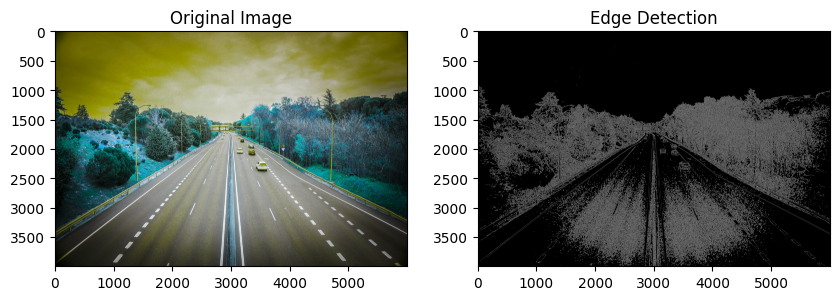

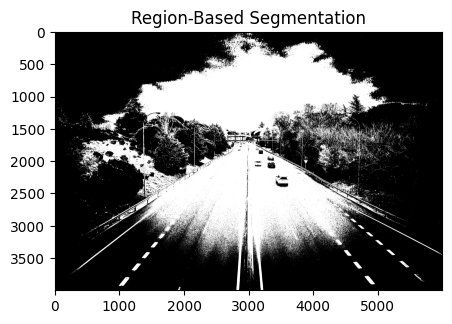

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/pexels-osho-1046227.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.show()

ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(binary, cmap='gray')
plt.title('Region-Based Segmentation')
plt.show()




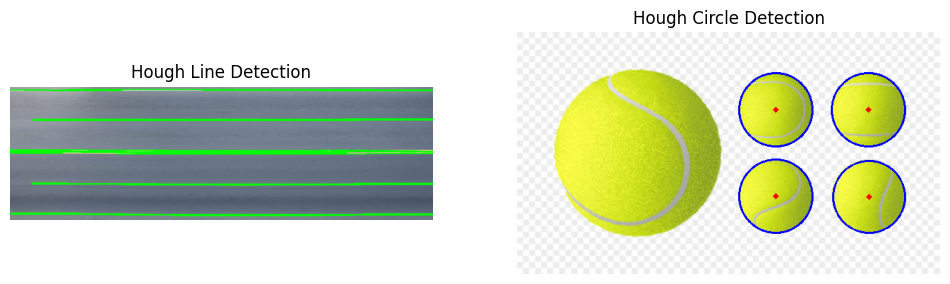

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/360_F_603506362_EmGPA1cjaRZZAsxxwVMESOx4EtFc0xQK.jpg')
edges = cv2.Canny(image, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=68, minLineLength=15, maxLineGap=250)#Minimum number of intersections in the Hough space
line_image = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# image for circle detection
eye_image = cv2.imread('istockphoto-1288742115-612x612.jpg')
gray = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9, 9), 2)


circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
    param1=100, param2=40, minRadius=10, maxRadius=100
)

circle_image = eye_image.copy()


if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cv2.circle(circle_image, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)  # Outer circle
        cv2.circle(circle_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)  #center


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Circle Detection')
plt.axis('off')

plt.show()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 122MB/s]



0: 640x480 2 persons, 23 cars, 1 bus, 4 trucks, 39.3ms
Speed: 10.6ms preprocess, 39.3ms inference, 313.4ms postprocess per image at shape (1, 3, 640, 480)


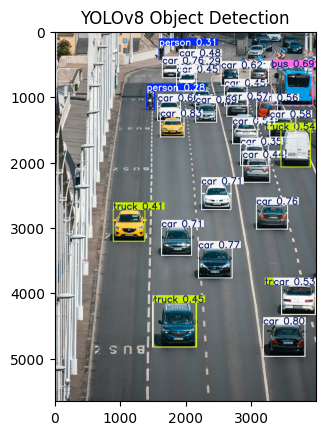

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 161MB/s]


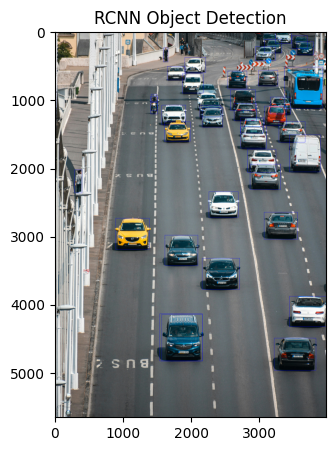

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
import torchvision
import torchvision.transforms as transforms
import warnings
warnings.filterwarnings("ignore")


yolo = YOLO('yolov8n.pt')

image = cv2.imread('keszthelyi-timi-P25wpQ8ndl8-unsplash.jpg')
results = yolo(image)


annotated_image = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('YOLOv8 Object Detection')
plt.show()


transform = transforms.Compose([transforms.ToTensor()])


model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

image_tensor = transform(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).unsqueeze(0)


with torch.no_grad():
    predictions = model(image_tensor)


rcnn_image = np.copy(image)
for i, box in enumerate(predictions[0]['boxes']):
    score = predictions[0]['scores'][i].item()
    if score > 0.5:
        x1, y1, x2, y2 = map(int, box.numpy())
        cv2.rectangle(rcnn_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(rcnn_image, cv2.COLOR_BGR2RGB))
plt.title('RCNN Object Detection')
plt.show()
